<a href="https://colab.research.google.com/github/Prem-ds/Linear_Regression/blob/main/Copy_of_Sentiment_Analysis_with_LSTM_(IMDB_Reviews).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: import the Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
# Step 2 : Load IMDB Dataset
# Load dataset (keep top 10,000 most frequent words)
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


###### 1- The IMDB dataset is already available in tf.keras.datasets
###### 2 - Its contains 50,000 reviews (25k train , 25k test), labeled 0= negative, 1 = Positive



In [ ]:
# Step 3 Preprocess (padding Sequences)
# we will pad/trancate each review to length 200 words.

max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)



In [ ]:
# Step 4 Build the LSTM Model

model = models.Sequential([
    layers.Embedding(input_dim=num_words, output_dim=128, input_length=max_len),
    layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Step 5 complie the model

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
# Step 6 Train the Model

history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=5,
    validation_data=(x_test, y_test),
    verbose=2
)


Epoch 1/5
391/391 - 322s - 825ms/step - accuracy: 0.7630 - loss: 0.4903 - val_accuracy: 0.8390 - val_loss: 0.3823
Epoch 2/5
391/391 - 323s - 827ms/step - accuracy: 0.8612 - loss: 0.3363 - val_accuracy: 0.8476 - val_loss: 0.3554
Epoch 3/5
391/391 - 323s - 826ms/step - accuracy: 0.8809 - loss: 0.2920 - val_accuracy: 0.8413 - val_loss: 0.3907
Epoch 4/5
391/391 - 322s - 823ms/step - accuracy: 0.8856 - loss: 0.2843 - val_accuracy: 0.8596 - val_loss: 0.3433
Epoch 5/5
391/391 - 323s - 827ms/step - accuracy: 0.9207 - loss: 0.2059 - val_accuracy: 0.8584 - val_loss: 0.3557


In [ ]:
# Step 7 Evalute on the Test data

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


782/782 - 60s - 76ms/step - accuracy: 0.8584 - loss: 0.3557
Test accuracy: 0.86


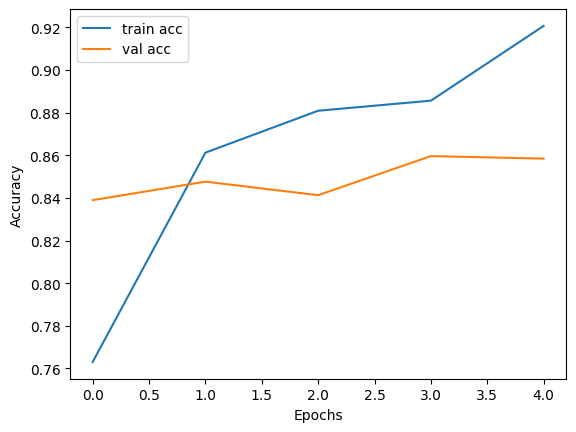

In [ ]:
# Step 8 Plot Accuracy /Loss Curves

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
